In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso, LassoCV, Ridge

## EDA (more EDA was done in data cleaning section)

In [69]:
# **Read the data dictionary.**
# Determine _what_ missing values mean.
# Figure out what each categorical value represents.
# Identify outliers.
# Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [70]:
train = pd.read_csv('C:/Users/james/Documents/GA/Projects/project-2/datasets/train.csv')

In [136]:
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [72]:
train.shape

(2051, 81)

In [73]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [137]:
# Baseline Price
train['SalePrice'].mean()

181534.626159102

## Data Cleaning

In [75]:
# DROP rows where column contains nulls
# 'Garage Area'
# 'Garage Cars'
# 'Total Bsmt SF'
train.dropna(subset=['Garage Area'], inplace=True)
train.dropna(subset=['Garage Cars'], inplace=True)
train.dropna(subset=['Total Bsmt SF'], inplace=True)

In [76]:
# Function that removes outliers in all columns with a threshold higher than a Z Score of 3
# Cite source: ChatGPT for the Z Score formula and part of the function as inspiration for my function.
def drop_outliers(df, columns):
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        outliers = df[np.abs(z_scores) > 3]
        df = df.drop(outliers.index)
    return df

In [77]:
# Variables used as features in final model
xvars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces',]

In [78]:
# DF with outliers eliminated
no_outlier_train = drop_outliers(train, xvars)

In [79]:
no_outlier_train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [80]:
# Check to make sure outliers were removed
no_outlier_train.shape

(1992, 81)

In [81]:
# Also, check by comparing to original df
train.shape

(2049, 81)

In [82]:
# makes Jupyter show all rows and columns for better visibility
pd.options.display.max_rows = train.shape[1]
pd.options.display.max_columns = train.shape[1]
pd.set_option('display.max_columns', 300)

In [83]:
# All missing values from highest to lowest
train.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2040
Misc Feature      1984
Alley             1909
Fence             1651
Mas Vnr Type      1238
Fireplace Qu       998
Lot Frontage       330
Garage Finish      113
Garage Type        113
Garage Yr Blt      113
Garage Qual        113
Garage Cond        113
Bsmt Exposure       57
BsmtFin Type 2      55
BsmtFin Type 1      54
Bsmt Cond           54
Bsmt Qual           54
Mas Vnr Area        22
Bsmt Half Bath       1
Bsmt Full Bath       1
Functional           0
Kitchen Qual         0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
TotRms AbvGrd        0
Full Bath            0
dtype: int64

## Exploratory Visualizations

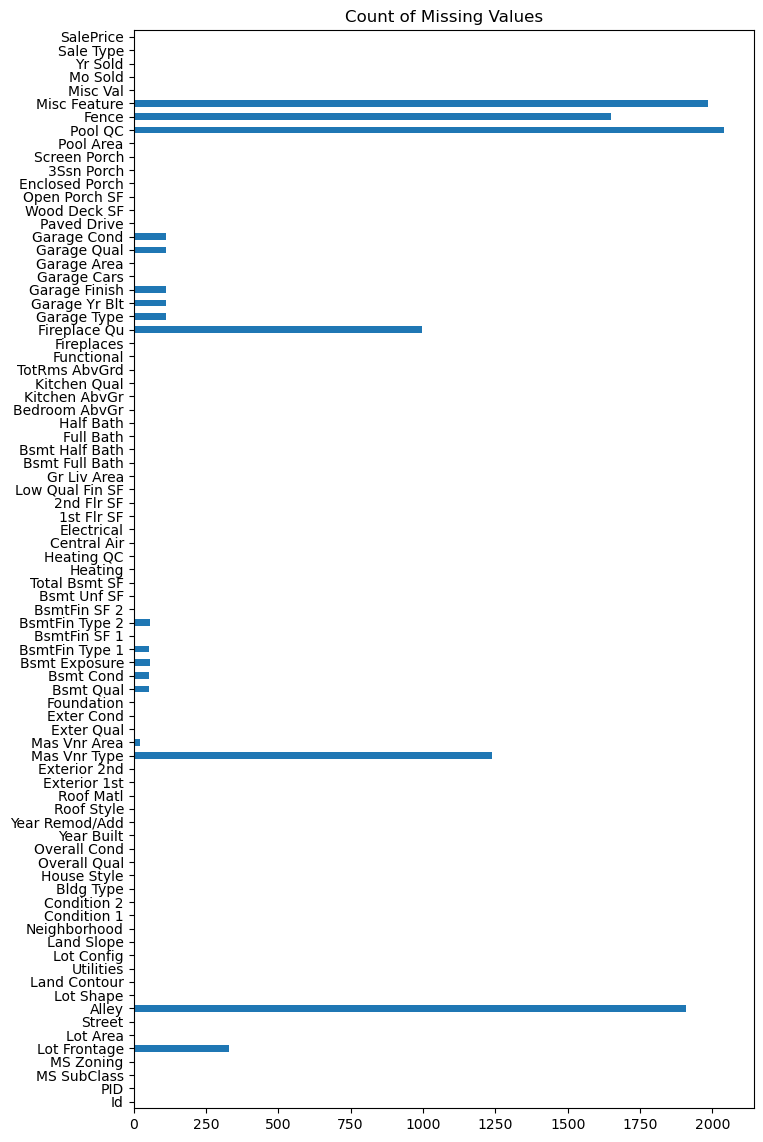

In [84]:
# GRAPH: Missing values in each column to identify which columns to avoid and which needed to be cleaned(if used in model)
train.isnull().sum().plot(kind='barh', figsize=(8,14))
plt.title('Count of Missing Values');

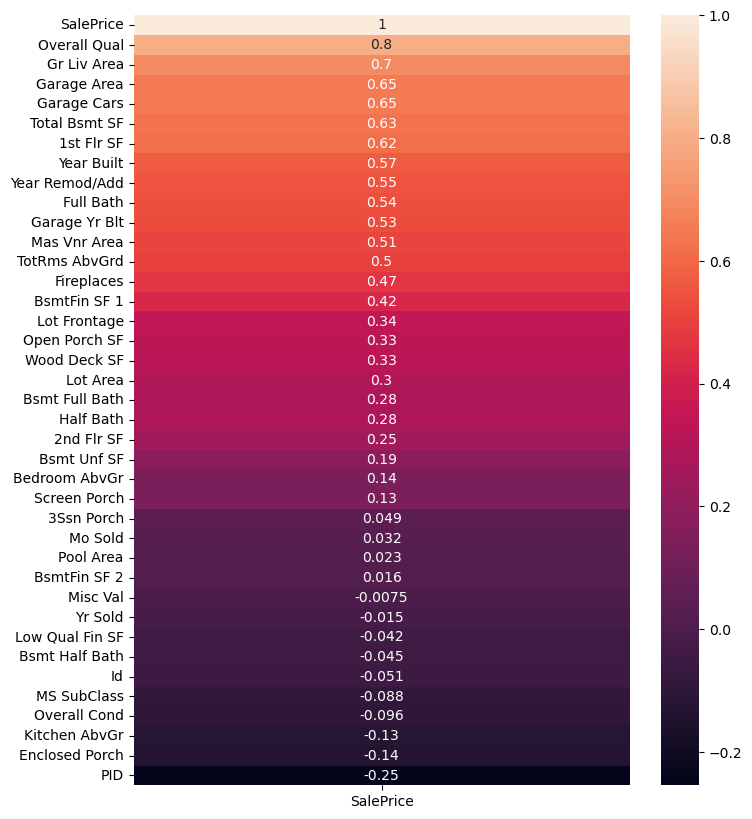

In [85]:
# shows the highest corellating variables for a single variable model // Started with top 12 variables in my first model.
plt.figure(figsize=(8,10))
sns.heatmap(train.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending = False), annot=True);

In [86]:
# Removing 'Wood Deck SF' and 'Lot area' from model improved my model scores

In [87]:
xvars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces']

In [88]:
X = no_outlier_train[xvars]
y = no_outlier_train['SalePrice']

In [89]:
# Confirming X variables have no NANs
X.isnull().sum().sort_values(ascending=False).head(27)

Overall Qual      0
Gr Liv Area       0
Garage Area       0
Garage Cars       0
Total Bsmt SF     0
Year Built        0
Year Remod/Add    0
Full Bath         0
Fireplaces        0
dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [91]:
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [92]:
model = LinearRegression()
model.fit(Z_train, y_train)

LinearRegression()

In [138]:
model.score(Z_train, y_train)

0.8257172186501613

In [94]:
model.score(Z_train, y_train)

0.8261549556614131

In [95]:
model.coef_

array([22114.15169527, 24054.52181185, 11094.08001453,  -868.00646532,
       14421.88082321,  7937.85351437,  8993.87929083, -5726.92531593,
        6516.21004475])

In [96]:
model.intercept_

178358.8386880857

In [97]:
# Step 5: Refit on all data
sc = StandardScaler()
Z = sc.fit_transform(X)

model.fit(Z, y)
print(model.score(Z, y))

0.8318049092400643


In [98]:
test = pd.read_csv('C:/Users/james/Documents/GA/Projects/project-2/datasets/test.csv')

In [99]:
# I refit the model multiple times with diferent combinations of variables, some scaled, some not. I tried Lasso, Ridge. 
# I found the best score was with the 9 variables below, scaled.

In [100]:
# Refit test.csv
test_scaled = sc.transform(test[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces']])

In [101]:
y_pred_submission = model.predict(test_scaled)

In [141]:
y_pred = model.predict(Z)

In [142]:
resids = y - y_pred

In [143]:
y.shape

(1992,)

In [144]:
y_pred.shape

(1992,)

In [145]:
# R2
metrics.r2_score(y, y_pred)

0.8318049092400643

In [107]:
# MSE: Went back to fix outliers // original score was aver 1 billion
mse = metrics.mean_squared_error(y, y_pred)
mse

864473208.310991

In [108]:
# RMSE:
np.sqrt(mse)

29401.925248374315

In [109]:
# LINEM ASSUMPTIONS

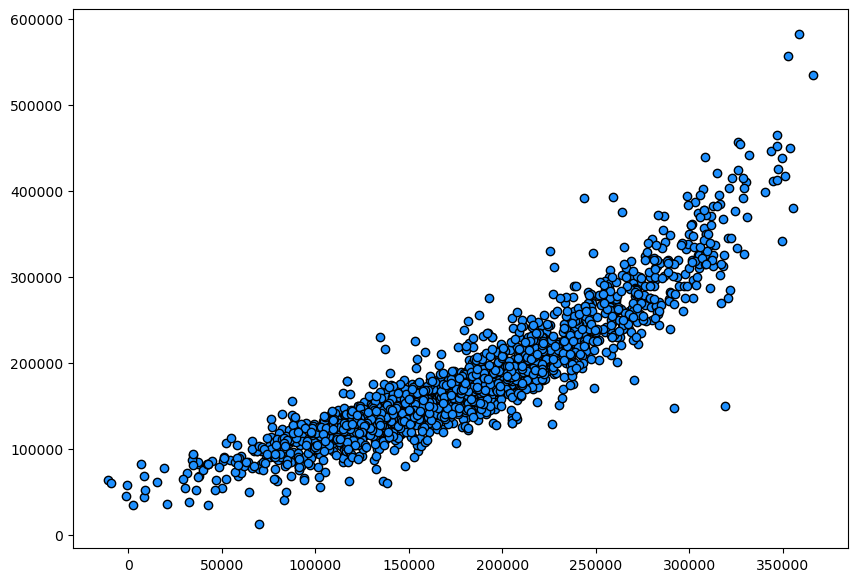

In [110]:
# Has equal variance of errors
plt.figure(figsize = (10, 7))
plt.scatter(y_pred, y, color = 'dodgerblue', edgecolor = 'black');

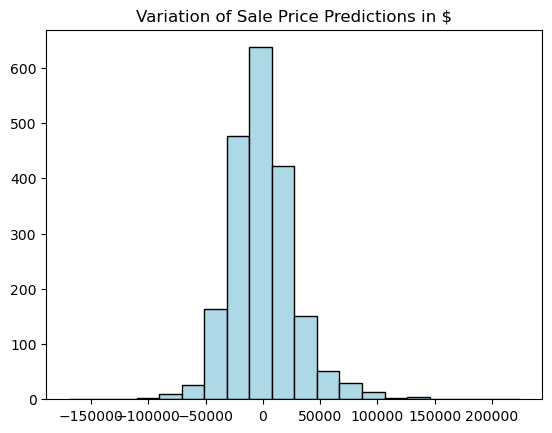

In [111]:
# Residuals are normally Distributed
# this is showing our model is doing well as there are not too many high values far away from the mean. Our margin of error is about $50k or less.
plt.hist(resids, bins=20, color='lightblue', edgecolor = 'black');
plt.title('Variation of Sale Price Predictions in $');

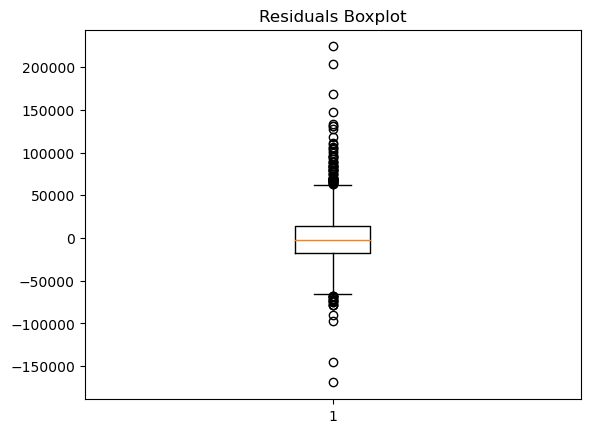

In [112]:
plt.boxplot(resids)
plt.title('Residuals Boxplot')
plt.show()

# Inferential Visualizations

In [113]:
# Renamed columns for visualizations
renamed_columns = {
    'Misc Val': 'Misc Value',
    'Yr Sold': 'Year Sold',
    'Low Qual Fin SF': 'Finished Sq Ft',
    'Bsmt Half Bath': 'Basement Half Bathrooms',
    'MS SubClass': 'Bldg Class',
    'Kitchen AbvGr': 'Kitchens',
    'Gr Liv Area': 'Living Area',
    'Total Bsmt SF': 'Basement Sq Ft',
    '1st Flr SF': '1st Floor Sq Ft',
    'Year Remod/Add': 'Year Remodeled',
    'Garage Yr Blt': 'Garage Year',
    'Mas Vnr Area': 'Masonry Veneer Area',
    'TotRms AbvGrd': 'Rooms',
    'Open Porch SF': 'Open Porch Sq Ft',
    'Wood Deck SF': 'Wood Deck Sq Ft',
    'SalePrice': 'Sale Price',
    # Add more mappings as needed
}

# Rename multiple column headers
train_renamed_cols = train.rename(columns=renamed_columns)


In [114]:
high_feats = train_renamed_cols.drop(columns=['Misc Value', 'Year Sold', 'Finished Sq Ft', 'Basement Half Bathrooms', 'Bldg Class', 'Kitchens', 'Enclosed Porch', 'Id', 'PID', 'Overall Cond', 'Half Bath', '2nd Flr SF', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Overall Qual', 'BsmtFin SF 1', 'Bsmt Full Bath', 'Lot Frontage'], axis=1)

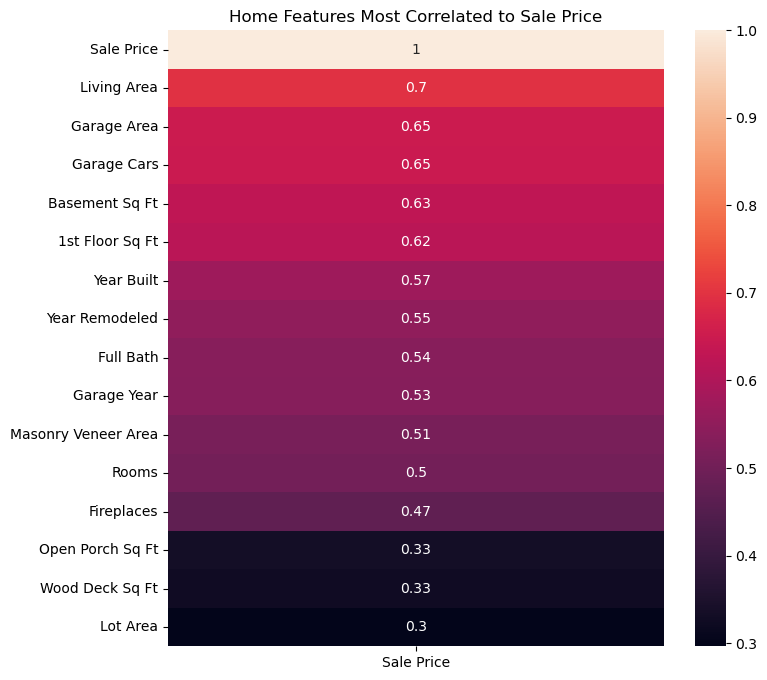

In [115]:
# house features that correlate to Sale Price the most
plt.figure(figsize=(8,8))
sns.heatmap(high_feats.corr(numeric_only=True)[['Sale Price']].sort_values(by='Sale Price', ascending = False), annot=True);
plt.title('Home Features Most Correlated to Sale Price');

In [116]:
low_feats = train_renamed_cols[['Sale Price', 'Year Sold', 'Finished Sq Ft', 'Basement Half Bathrooms', 'Bldg Class', 'Kitchens', 'Enclosed Porch', 'Overall Cond']]

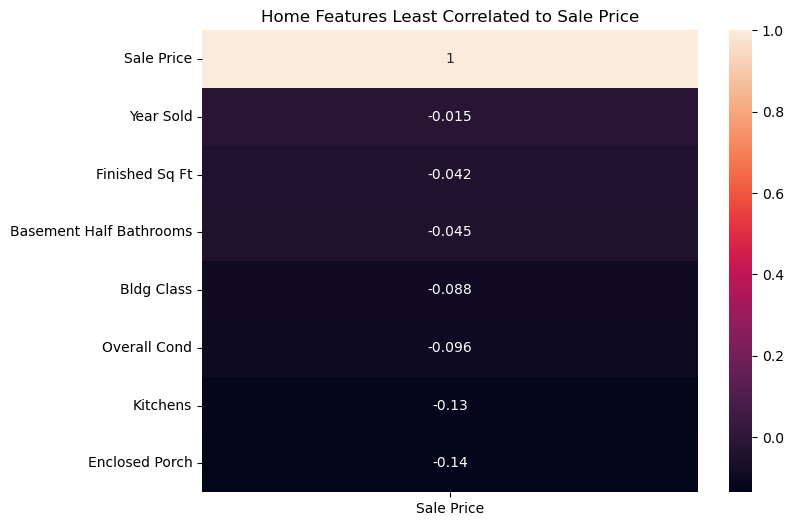

In [117]:
# house features that correlate to Sale Price the least
plt.figure(figsize=(8,6))
sns.heatmap(low_feats.corr(numeric_only=True)[['Sale Price']].sort_values(by='Sale Price', ascending = False), annot=True);
plt.title('Home Features Least Correlated to Sale Price');

## Predictions are normally Distributed. Showing bulk of housing price predictions around $120k-$160k
plt.hist(y_pred, bins=25, color='royalblue', edgecolor = 'white');
plt.title('Distribution of Sale Price Predictions');

In [119]:
train['SalePrice'].mean()

181534.626159102

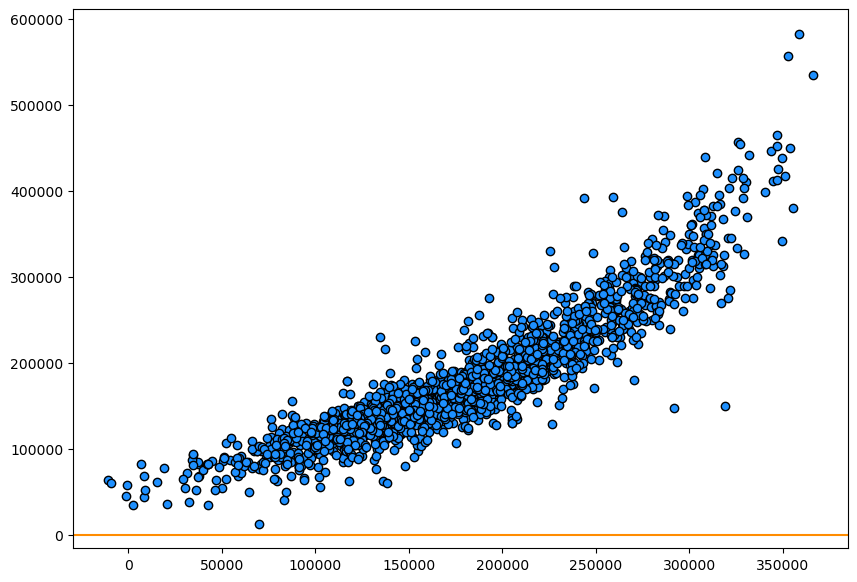

In [120]:
plt.figure(figsize = (10, 7))
plt.scatter(y_pred, y, color = 'dodgerblue', edgecolor = 'black')
plt.axhline(0, color = 'darkorange');

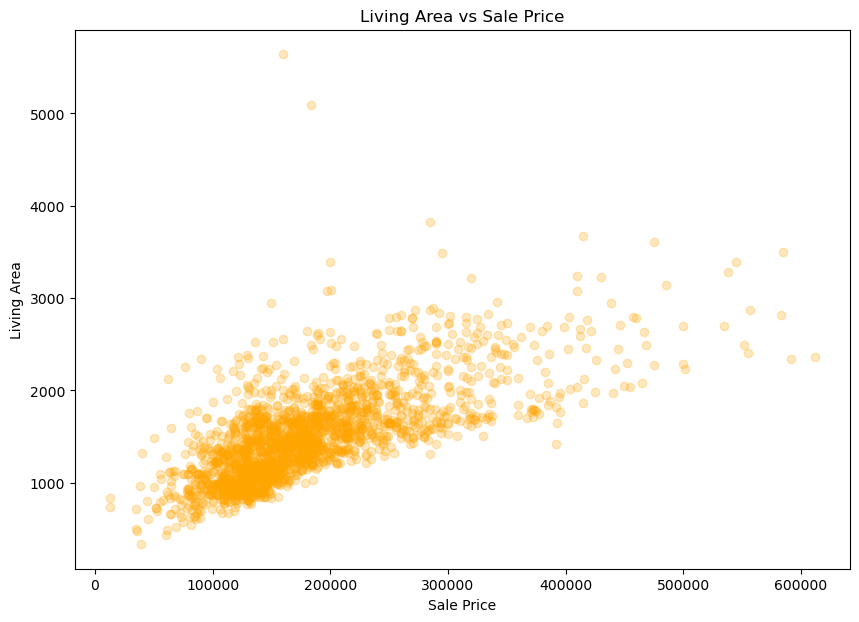

In [121]:
# Obvious steady correlation between Greater Living Area and Sale Price
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Living Area'], color = 'orange', alpha=.25)
plt.xlabel('Sale Price')
plt.ylabel('Living Area')
plt.title('Living Area vs Sale Price');

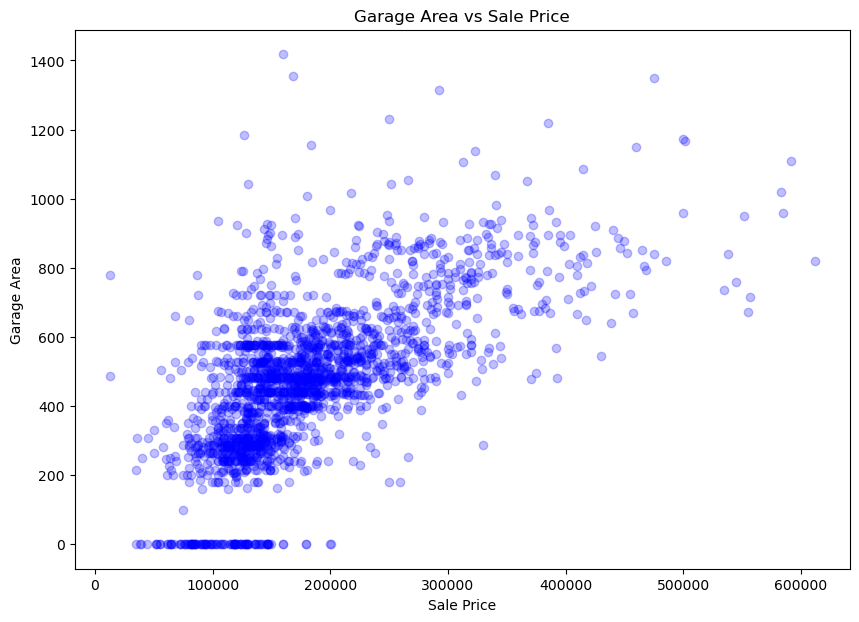

In [122]:
# Steady Here we see many0 homes without garages in the 50k-120k range. Bulk is between 100k-250k
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Garage Area'], color = 'blue', alpha=.25)
plt.xlabel('Sale Price')
plt.ylabel('Garage Area')
plt.title('Garage Area vs Sale Price');

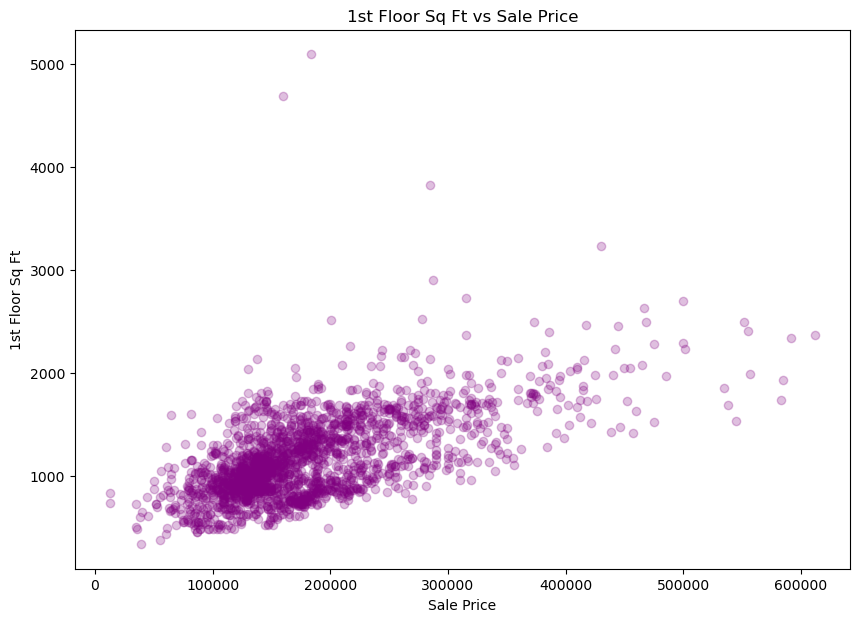

In [123]:
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['1st Floor Sq Ft'], color = 'purple', alpha=.25)
plt.xlabel('Sale Price')
plt.ylabel('1st Floor Sq Ft')
plt.title('1st Floor Sq Ft vs Sale Price');

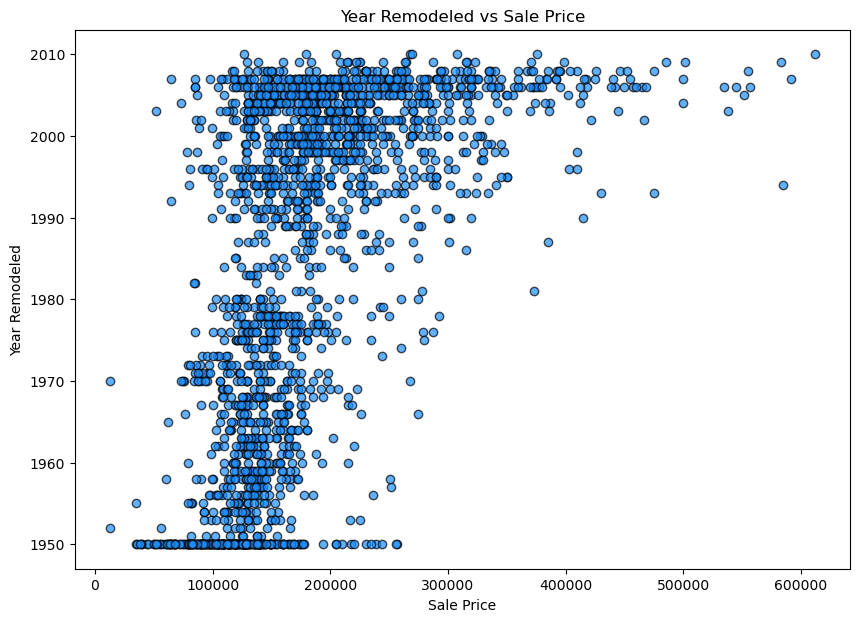

In [124]:

plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Year Remodeled'], color = 'dodgerblue', edgecolor = 'black', alpha=.7)
plt.xlabel('Sale Price')
plt.ylabel('Year Remodeled')
plt.title('Year Remodeled vs Sale Price');

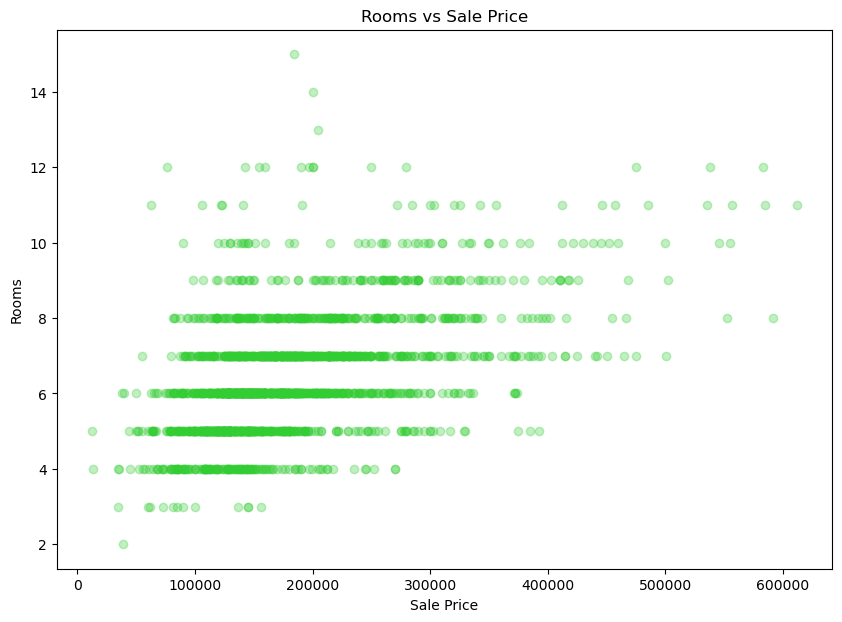

In [125]:
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Rooms'], color = 'limegreen', alpha=.3)
plt.xlabel('Sale Price')
plt.ylabel('Rooms')
plt.title('Rooms vs Sale Price');

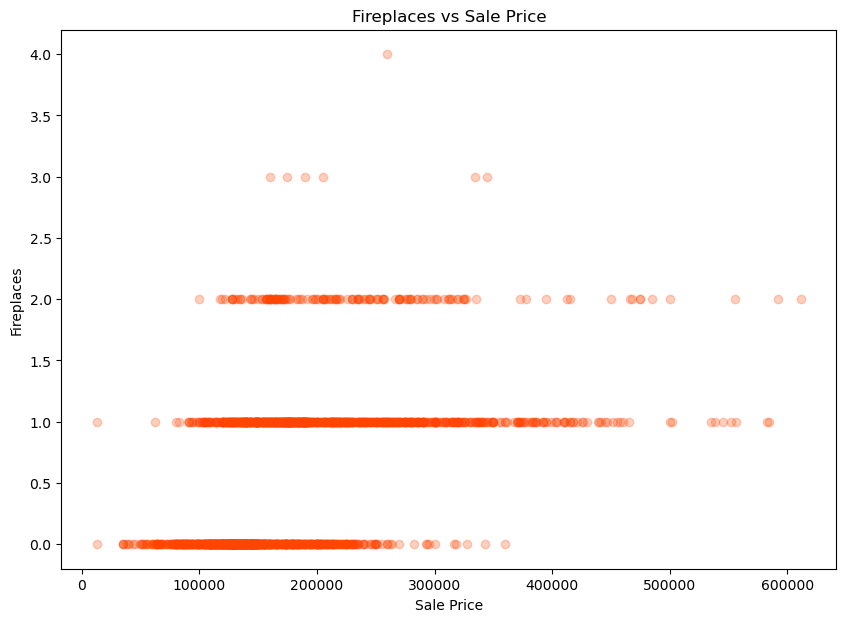

In [126]:
# Houses with just 1 fireplace had a much wider price range than houses with no fireplace
plt.figure(figsize = (10, 7))
plt.scatter(train_renamed_cols['Sale Price'], train_renamed_cols['Fireplaces'], color = 'orangered', alpha=.25)
plt.xlabel('Sale Price')
plt.ylabel('Fireplaces')
plt.title('Fireplaces vs Sale Price');

### SUBMISSIONS

In [127]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [128]:
test['SalePrice'] = y_pred_submission

In [129]:
james_submission = test[['Id', 'SalePrice']]

In [130]:
james_submission.set_index('Id', inplace=True)

In [131]:
# james_submission.to_csv('C:/Users/james/Documents/GA/Projects/project-2/data/james_submission_5_scaled.csv')